<a href="https://colab.research.google.com/github/mariyam-ahmed/portfolio/blob/main/Airbnb%202%3A%20cleaning_airbnb_data_and_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import ast
import re
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('final_airbnb.csv')
df = df.drop(columns = 'Unnamed: 0')

In [ ]:
df = df.replace('Unknown', np.nan)
df = df.replace('Cookie Policy', np.nan)
df = df.replace('Show moreShow more. Open host profile.', np.nan)
df = df.replace('No reviews yet', np.nan)
df['rating_2'] = df['rating_2'].replace('New', np.nan)
df

,location,title,header,url,subtitle,rooms,rating_1,rating_2,reviews_1,reviews_2,description,amenities,price
0,Addington Highlands,Cabin in Cloyne,NaN,/rooms/1000670442947378230?adults=1&children=0...,"Entire cabin in Cloyne, Canada",2 guests · · Studio · · 1 bed · · 1 bath,NaN,NaN,NaN,NaN,Looking for a little piece of Paradise? Look n...,"['Lake view', 'Private beach access', 'Kitchen...",$108 CAD
1,Addington Highlands,Cabin in Addington Highlands,NaN,/rooms/52719580?adults=1&children=0&enable_m3_...,"Entire cabin in Addington Highlands, Canada",4 guests · · 1 bedroom · · 2 beds · · Half-...,NaN,4.71,NaN,200 reviews,Welcome to Henrys Cabin ! Located right on the...,"['River view', 'Waterfront', 'Wifi', 'Free par...",$132 CAD
2,Addington Highlands,Cottage in Cloyne,NaN,/rooms/930619487233971786?adults=1&children=0&...,"Entire cottage in Cloyne, Canada",7 guests · · 4 bedrooms · · 5 beds · · 1 bath,NaN,NaN,NaN,2 reviews,***NEW FOR 2024: KAYAKS!!!!***Welcome to Skoot...,"['Lake view', 'Waterfront', 'Kitchen', 'Wifi',...",$270 CAD
3,Addington Highlands,Guest suite in Cloyne,NaN,/rooms/46217683?adults=1&children=0&enable_m3_...,"Entire guest suite in Cloyne, Canada",2 guests · · Studio · · 1 bed · · 1 bath,Rated 4.83 out of 5 stars.4.83,NaN,207,NaN,Behold The Emerald Suite. This little gem is j...,"['Bay view', 'Resort view', 'Beach access', 'K...",$110 CAD
4,Addington Highlands,Cottage in North Frontenac,NaN,/rooms/713749742650522092?adults=1&children=0&...,"Entire cottage in North Frontenac, Canada",7 guests · · 3 bedrooms · · 4 beds · · 1 bath,Rated 5.0 out of 5 stars.5.0,NaN,16,NaN,Come relax and unwind at this recently renovat...,"['Lake view', 'Private beach access – Beachfro...",$225 CAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23746,Enniskillen,"Apartment in Donegal, Ireland",NaN,/rooms/45133613?adults=1&children=0&enable_m3_...,"Entire rental unit in Donegal, Ireland",4 guests · · 2 bedrooms · · 3 beds · · 1 bath,Rated 4.88 out of 5 stars.4.88,NaN,108,NaN,This listing is available to couples and famil...,"['Kitchen', 'Wifi', 'Free parking on premises'...",$125 CAD
23747,Enniskillen,"Room in Kesh, UK",NaN,/rooms/42360549?adults=1&category_tag=Tag%3A86...,"Room in Kesh, United Kingdom",2 beds · · Private attached bathroom,Rated 4.92 out of 5 stars.4.92,NaN,110,NaN,Boa Island Lodge Guest Accommodation is locate...,"['Lock on bedroom door', 'Garden view', 'Kitch...",$112 CAD
23748,Enniskillen,"Home in County Donegal, Ireland",NaN,/rooms/891866402738008981?adults=1&children=0&...,Entire home in Ireland,6 guests · · 3 bedrooms · · 4 beds · · 3 baths,Rated 5.0 out of 5 stars.5.0,NaN,12,NaN,Newly renovated luxury home with stunning view...,"['Marina view', 'Bay view', 'Beach access', 'K...",$354 CAD
23749,Enniskillen,"Tiny homes in Fermanagh and Omagh, UK",NaN,/rooms/676147986488122754?adults=1&children=0&...,"Tiny homes in Fermanagh and Omagh, United Kingdom",2 guests · · 1 bedroom · · 1 bed · · 1.5 baths,Rated 5.0 out of 5 stars.5.0,NaN,14,NaN,Our lovely little laragh Piglet is a Glamping ...,"['Kitchen', 'Wifi', 'Dedicated workspace', 'Fr...",$280 CAD


In [ ]:
df[df['rooms'].isna()].index

Index([ 4865, 11328, 14577, 17377, 18150, 18843, 19113, 19458, 20613, 21918,
       22825, 22997, 23374, 23375, 23376],
      dtype='int64')

In [ ]:
df = df.drop(index = [ 4865, 11328, 14577, 17377, 18150, 18843, 19113, 19458, 20613, 21918,
       22825, 22997, 23374, 23375, 23376])
df = df.reset_index(drop=True)

In [ ]:
df['rooms'] = df['rooms'].dropna()
for item, i in zip(df['rooms'], df.index):

  rooms = item.split(' ·  · ')

  for room in rooms:
    if 'guests' in room:
      df.at[i, 'guests'] = ''.join(re.findall(r"[-+]?(?:\d*\.*\d+)", room))
    elif 'bedroom' in room:
      df.at[i, 'bedroom'] = ''.join(re.findall(r"[-+]?(?:\d*\.*\d+)", room))
    elif 'tudio' in room:
      df.at[i, 'bedroom'] = room
    elif 'bath' in room:
      df.at[i, 'bath'] = ''.join(re.findall(r"[-+]?(?:\d*\.*\d+)", room))


In [ ]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
df

,location,title,header,url,subtitle,rooms,rating_1,rating_2,reviews_1,reviews_2,description,amenities,price,guests,bedroom,bath
0,Addington Highlands,Cabin in Cloyne,NaN,/rooms/1000670442947378230?adults=1&children=0...,"Entire cabin in Cloyne, Canada",2 guests · · Studio · · 1 bed · · 1 bath,NaN,NaN,NaN,NaN,Looking for a little piece of Paradise? Look n...,"['Lake view', 'Private beach access', 'Kitchen...",$108 CAD,2,Studio,1
1,Addington Highlands,Cabin in Addington Highlands,NaN,/rooms/52719580?adults=1&children=0&enable_m3_...,"Entire cabin in Addington Highlands, Canada",4 guests · · 1 bedroom · · 2 beds · · Half-...,NaN,4.71,NaN,200 reviews,Welcome to Henrys Cabin ! Located right on the...,"['River view', 'Waterfront', 'Wifi', 'Free par...",$132 CAD,4,1,NaN
2,Addington Highlands,Cottage in Cloyne,NaN,/rooms/930619487233971786?adults=1&children=0&...,"Entire cottage in Cloyne, Canada",7 guests · · 4 bedrooms · · 5 beds · · 1 bath,NaN,NaN,NaN,2 reviews,***NEW FOR 2024: KAYAKS!!!!***Welcome to Skoot...,"['Lake view', 'Waterfront', 'Kitchen', 'Wifi',...",$270 CAD,7,4,1
3,Addington Highlands,Guest suite in Cloyne,NaN,/rooms/46217683?adults=1&children=0&enable_m3_...,"Entire guest suite in Cloyne, Canada",2 guests · · Studio · · 1 bed · · 1 bath,Rated 4.83 out of 5 stars.4.83,NaN,207,NaN,Behold The Emerald Suite. This little gem is j...,"['Bay view', 'Resort view', 'Beach access', 'K...",$110 CAD,2,Studio,1
4,Addington Highlands,Cottage in North Frontenac,NaN,/rooms/713749742650522092?adults=1&children=0&...,"Entire cottage in North Frontenac, Canada",7 guests · · 3 bedrooms · · 4 beds · · 1 bath,Rated 5.0 out of 5 stars.5.0,NaN,16,NaN,Come relax and unwind at this recently renovat...,"['Lake view', 'Private beach access – Beachfro...",$225 CAD,7,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23731,Enniskillen,"Apartment in Donegal, Ireland",NaN,/rooms/45133613?adults=1&children=0&enable_m3_...,"Entire rental unit in Donegal, Ireland",4 guests · · 2 bedrooms · · 3 beds · · 1 bath,Rated 4.88 out of 5 stars.4.88,NaN,108,NaN,This listing is available to couples and famil...,"['Kitchen', 'Wifi', 'Free parking on premises'...",$125 CAD,4,2,1
23732,Enniskillen,"Room in Kesh, UK",NaN,/rooms/42360549?adults=1&category_tag=Tag%3A86...,"Room in Kesh, United Kingdom",2 beds · · Private attached bathroom,Rated 4.92 out of 5 stars.4.92,NaN,110,NaN,Boa Island Lodge Guest Accommodation is locate...,"['Lock on bedroom door', 'Garden view', 'Kitch...",$112 CAD,NaN,NaN,NaN
23733,Enniskillen,"Home in County Donegal, Ireland",NaN,/rooms/891866402738008981?adults=1&children=0&...,Entire home in Ireland,6 guests · · 3 bedrooms · · 4 beds · · 3 baths,Rated 5.0 out of 5 stars.5.0,NaN,12,NaN,Newly renovated luxury home with stunning view...,"['Marina view', 'Bay view', 'Beach access', 'K...",$354 CAD,6,3,3
23734,Enniskillen,"Tiny homes in Fermanagh and Omagh, UK",NaN,/rooms/676147986488122754?adults=1&children=0&...,"Tiny homes in Fermanagh and Omagh, United Kingdom",2 guests · · 1 bedroom · · 1 bed · · 1.5 baths,Rated 5.0 out of 5 stars.5.0,NaN,14,NaN,Our lovely little laragh Piglet is a Glamping ...,"['Kitchen', 'Wifi', 'Dedicated workspace', 'Fr...",$280 CAD,2,1,1.5


In [ ]:
df = df.drop(columns='rooms')

In [ ]:
for rating, nann, i in zip(df['rating_1'], df['rating_1'].isna(), df.index):

  if not nann: #not np.isnan(float(rating)):
    df.at[i, 'rating_1'] = rating.split(' ')[1]

In [ ]:
for rating, nann, i in zip(df['reviews_2'], df['reviews_2'].isna(), df.index):

  if not nann: #not np.isnan(float(rating)):
    df.at[i, 'reviews_2'] = rating.split(' ')[0]

In [ ]:
df

,location,title,header,url,subtitle,rating_1,rating_2,reviews_1,reviews_2,description,amenities,price,guests,bedroom,bath
0,Addington Highlands,Cabin in Cloyne,NaN,/rooms/1000670442947378230?adults=1&children=0...,"Entire cabin in Cloyne, Canada",NaN,NaN,NaN,NaN,Looking for a little piece of Paradise? Look n...,"['Lake view', 'Private beach access', 'Kitchen...",$108 CAD,2,Studio,1
1,Addington Highlands,Cabin in Addington Highlands,NaN,/rooms/52719580?adults=1&children=0&enable_m3_...,"Entire cabin in Addington Highlands, Canada",NaN,4.71,NaN,200,Welcome to Henrys Cabin ! Located right on the...,"['River view', 'Waterfront', 'Wifi', 'Free par...",$132 CAD,4,1,NaN
2,Addington Highlands,Cottage in Cloyne,NaN,/rooms/930619487233971786?adults=1&children=0&...,"Entire cottage in Cloyne, Canada",NaN,NaN,NaN,2,***NEW FOR 2024: KAYAKS!!!!***Welcome to Skoot...,"['Lake view', 'Waterfront', 'Kitchen', 'Wifi',...",$270 CAD,7,4,1
3,Addington Highlands,Guest suite in Cloyne,NaN,/rooms/46217683?adults=1&children=0&enable_m3_...,"Entire guest suite in Cloyne, Canada",4.83,NaN,207,NaN,Behold The Emerald Suite. This little gem is j...,"['Bay view', 'Resort view', 'Beach access', 'K...",$110 CAD,2,Studio,1
4,Addington Highlands,Cottage in North Frontenac,NaN,/rooms/713749742650522092?adults=1&children=0&...,"Entire cottage in North Frontenac, Canada",5.0,NaN,16,NaN,Come relax and unwind at this recently renovat...,"['Lake view', 'Private beach access – Beachfro...",$225 CAD,7,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23731,Enniskillen,"Apartment in Donegal, Ireland",NaN,/rooms/45133613?adults=1&children=0&enable_m3_...,"Entire rental unit in Donegal, Ireland",4.88,NaN,108,NaN,This listing is available to couples and famil...,"['Kitchen', 'Wifi', 'Free parking on premises'...",$125 CAD,4,2,1
23732,Enniskillen,"Room in Kesh, UK",NaN,/rooms/42360549?adults=1&category_tag=Tag%3A86...,"Room in Kesh, United Kingdom",4.92,NaN,110,NaN,Boa Island Lodge Guest Accommodation is locate...,"['Lock on bedroom door', 'Garden view', 'Kitch...",$112 CAD,NaN,NaN,NaN
23733,Enniskillen,"Home in County Donegal, Ireland",NaN,/rooms/891866402738008981?adults=1&children=0&...,Entire home in Ireland,5.0,NaN,12,NaN,Newly renovated luxury home with stunning view...,"['Marina view', 'Bay view', 'Beach access', 'K...",$354 CAD,6,3,3
23734,Enniskillen,"Tiny homes in Fermanagh and Omagh, UK",NaN,/rooms/676147986488122754?adults=1&children=0&...,"Tiny homes in Fermanagh and Omagh, United Kingdom",5.0,NaN,14,NaN,Our lovely little laragh Piglet is a Glamping ...,"['Kitchen', 'Wifi', 'Dedicated workspace', 'Fr...",$280 CAD,2,1,1.5


In [ ]:
df['rating'] = df['rating_1'].fillna(df['rating_2'])
df['reviews'] = df['reviews_1'].fillna(df['reviews_2'])

In [ ]:
df

,location,title,header,url,subtitle,rating_1,rating_2,reviews_1,reviews_2,description,amenities,price,guests,bedroom,bath,rating,reviews
0,Addington Highlands,Cabin in Cloyne,NaN,/rooms/1000670442947378230?adults=1&children=0...,"Entire cabin in Cloyne, Canada",NaN,NaN,NaN,NaN,Looking for a little piece of Paradise? Look n...,"['Lake view', 'Private beach access', 'Kitchen...",$108 CAD,2,Studio,1,NaN,NaN
1,Addington Highlands,Cabin in Addington Highlands,NaN,/rooms/52719580?adults=1&children=0&enable_m3_...,"Entire cabin in Addington Highlands, Canada",NaN,4.71,NaN,200,Welcome to Henrys Cabin ! Located right on the...,"['River view', 'Waterfront', 'Wifi', 'Free par...",$132 CAD,4,1,NaN,4.71,200
2,Addington Highlands,Cottage in Cloyne,NaN,/rooms/930619487233971786?adults=1&children=0&...,"Entire cottage in Cloyne, Canada",NaN,NaN,NaN,2,***NEW FOR 2024: KAYAKS!!!!***Welcome to Skoot...,"['Lake view', 'Waterfront', 'Kitchen', 'Wifi',...",$270 CAD,7,4,1,NaN,2
3,Addington Highlands,Guest suite in Cloyne,NaN,/rooms/46217683?adults=1&children=0&enable_m3_...,"Entire guest suite in Cloyne, Canada",4.83,NaN,207,NaN,Behold The Emerald Suite. This little gem is j...,"['Bay view', 'Resort view', 'Beach access', 'K...",$110 CAD,2,Studio,1,4.83,207
4,Addington Highlands,Cottage in North Frontenac,NaN,/rooms/713749742650522092?adults=1&children=0&...,"Entire cottage in North Frontenac, Canada",5.0,NaN,16,NaN,Come relax and unwind at this recently renovat...,"['Lake view', 'Private beach access – Beachfro...",$225 CAD,7,3,1,5.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23731,Enniskillen,"Apartment in Donegal, Ireland",NaN,/rooms/45133613?adults=1&children=0&enable_m3_...,"Entire rental unit in Donegal, Ireland",4.88,NaN,108,NaN,This listing is available to couples and famil...,"['Kitchen', 'Wifi', 'Free parking on premises'...",$125 CAD,4,2,1,4.88,108
23732,Enniskillen,"Room in Kesh, UK",NaN,/rooms/42360549?adults=1&category_tag=Tag%3A86...,"Room in Kesh, United Kingdom",4.92,NaN,110,NaN,Boa Island Lodge Guest Accommodation is locate...,"['Lock on bedroom door', 'Garden view', 'Kitch...",$112 CAD,NaN,NaN,NaN,4.92,110
23733,Enniskillen,"Home in County Donegal, Ireland",NaN,/rooms/891866402738008981?adults=1&children=0&...,Entire home in Ireland,5.0,NaN,12,NaN,Newly renovated luxury home with stunning view...,"['Marina view', 'Bay view', 'Beach access', 'K...",$354 CAD,6,3,3,5.0,12
23734,Enniskillen,"Tiny homes in Fermanagh and Omagh, UK",NaN,/rooms/676147986488122754?adults=1&children=0&...,"Tiny homes in Fermanagh and Omagh, United Kingdom",5.0,NaN,14,NaN,Our lovely little laragh Piglet is a Glamping ...,"['Kitchen', 'Wifi', 'Dedicated workspace', 'Fr...",$280 CAD,2,1,1.5,5.0,14


In [ ]:
df = df.drop(columns = ['reviews_1', 'reviews_2', 'rating_1', 'rating_2'])

In [ ]:
df[df['title'].isna()].index

Index([19951, 19952, 19953, 19954, 19955, 19956, 19957, 19958, 19959, 19960,
       19961, 19962, 19963, 19964, 19965, 19966, 19967, 19968],
      dtype='int64')

In [ ]:
df = df.drop(index = [19951, 19952, 19953, 19954, 19955, 19956, 19957, 19958, 19959, 19960,
       19961, 19962, 19963, 19964, 19965, 19966, 19967, 19968])
df = df.reset_index(drop=True)

In [ ]:
df

,location,title,header,url,subtitle,description,amenities,price,guests,bedroom,bath,rating,reviews
0,Addington Highlands,Cabin in Cloyne,NaN,/rooms/1000670442947378230?adults=1&children=0...,"Entire cabin in Cloyne, Canada",Looking for a little piece of Paradise? Look n...,"['Lake view', 'Private beach access', 'Kitchen...",$108 CAD,2,Studio,1,NaN,NaN
1,Addington Highlands,Cabin in Addington Highlands,NaN,/rooms/52719580?adults=1&children=0&enable_m3_...,"Entire cabin in Addington Highlands, Canada",Welcome to Henrys Cabin ! Located right on the...,"['River view', 'Waterfront', 'Wifi', 'Free par...",$132 CAD,4,1,NaN,4.71,200
2,Addington Highlands,Cottage in Cloyne,NaN,/rooms/930619487233971786?adults=1&children=0&...,"Entire cottage in Cloyne, Canada",***NEW FOR 2024: KAYAKS!!!!***Welcome to Skoot...,"['Lake view', 'Waterfront', 'Kitchen', 'Wifi',...",$270 CAD,7,4,1,NaN,2
3,Addington Highlands,Guest suite in Cloyne,NaN,/rooms/46217683?adults=1&children=0&enable_m3_...,"Entire guest suite in Cloyne, Canada",Behold The Emerald Suite. This little gem is j...,"['Bay view', 'Resort view', 'Beach access', 'K...",$110 CAD,2,Studio,1,4.83,207
4,Addington Highlands,Cottage in North Frontenac,NaN,/rooms/713749742650522092?adults=1&children=0&...,"Entire cottage in North Frontenac, Canada",Come relax and unwind at this recently renovat...,"['Lake view', 'Private beach access – Beachfro...",$225 CAD,7,3,1,5.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23713,Enniskillen,"Apartment in Donegal, Ireland",NaN,/rooms/45133613?adults=1&children=0&enable_m3_...,"Entire rental unit in Donegal, Ireland",This listing is available to couples and famil...,"['Kitchen', 'Wifi', 'Free parking on premises'...",$125 CAD,4,2,1,4.88,108
23714,Enniskillen,"Room in Kesh, UK",NaN,/rooms/42360549?adults=1&category_tag=Tag%3A86...,"Room in Kesh, United Kingdom",Boa Island Lodge Guest Accommodation is locate...,"['Lock on bedroom door', 'Garden view', 'Kitch...",$112 CAD,NaN,NaN,NaN,4.92,110
23715,Enniskillen,"Home in County Donegal, Ireland",NaN,/rooms/891866402738008981?adults=1&children=0&...,Entire home in Ireland,Newly renovated luxury home with stunning view...,"['Marina view', 'Bay view', 'Beach access', 'K...",$354 CAD,6,3,3,5.0,12
23716,Enniskillen,"Tiny homes in Fermanagh and Omagh, UK",NaN,/rooms/676147986488122754?adults=1&children=0&...,"Tiny homes in Fermanagh and Omagh, United Kingdom",Our lovely little laragh Piglet is a Glamping ...,"['Kitchen', 'Wifi', 'Dedicated workspace', 'Fr...",$280 CAD,2,1,1.5,5.0,14


In [ ]:
df['property_type'] = [title.split(' ')[0] for title in df['title']]

In [ ]:
print(set(df['property_type']))

{'Villa', 'Treehouse', 'Guesthouse', 'Campsite', 'Guest', 'Cottage', 'Tent', 'Castle', 'Lighthouse', 'Room', 'Boutique', 'Casa', 'Camper/RV', 'Resort', 'Aparthotel', 'Home', 'Houseboat', 'Place', 'Shipping', 'Bed', 'Religious', 'Apartment', 'Yurt', 'Bungalow', 'Tiny', 'Earth', 'Farm', 'Chalet', 'Loft', 'Boat', 'Holiday', 'Shepherd’s', 'Condo', 'Hotel', 'Barn', 'Island', 'Tower', 'Shared', 'Cabin', 'Vacation', 'Ranch', 'Hostel', 'Hut', 'Dome', 'Townhouse', 'Nature', 'Train'}


In [ ]:
property_types_list = ['Villa', 'Camper/RV', 'Campsite', 'Cottage', 'Apartment', 'Home', 'Tent', 'Dome', 'Farm', 'Cabin', 'Treehouse', 'Chalet', 'Guesthouse', 'Loft', 'Room', 'Bungalow', 'Townhouse', 'Yurt', 'Condo', 'Barn', 'Bed', 'Hotel']


df.loc[~df['property_type'].isin(property_types_list), 'property_type'] = 'Home'

<Axes: xlabel='property_type'>

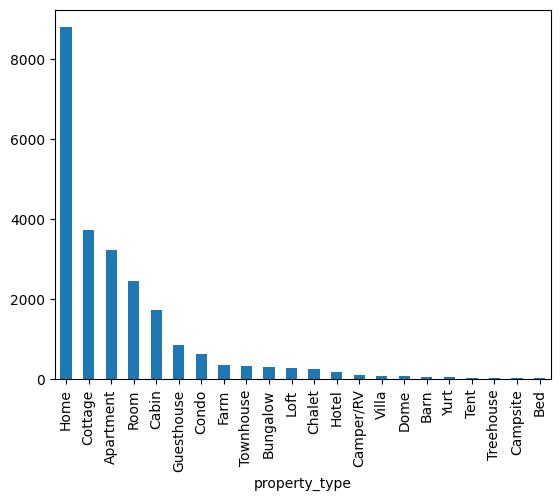

In [ ]:
df['property_type'].value_counts().plot(kind='bar')

In [ ]:
df = pd.get_dummies(df, columns=['property_type'], prefix='property_type')

In [ ]:
df['amenities']

0      [Lake view, Waterfront, Kitchen, Wifi, Free pa...
1      [Lake view, Public or shared beach access, Kit...
2      [River view, Waterfront, Wifi, Free parking on...
3      [Lake view, Private beach access – Beachfront,...
4      [River view, Waterfront, Kitchen, Wifi, Dedica...
                             ...                        
645    [Kitchen, Wifi, Dedicated workspace, Free park...
646    [Lock on bedroom door, Kitchen, Wifi, Dedicate...
647    [Lock on bedroom door, Kitchen, Wifi, Free par...
648    [Kitchen, Wifi, Free parking on premises, TV w...
649    [Lock on bedroom door, Courtyard view, Garden ...
Name: amenities, Length: 650, dtype: object

In [ ]:
df['amenities'] = [ast.literal_eval(df['amenities'][i]) for i in range(len(df))]

<Axes: >

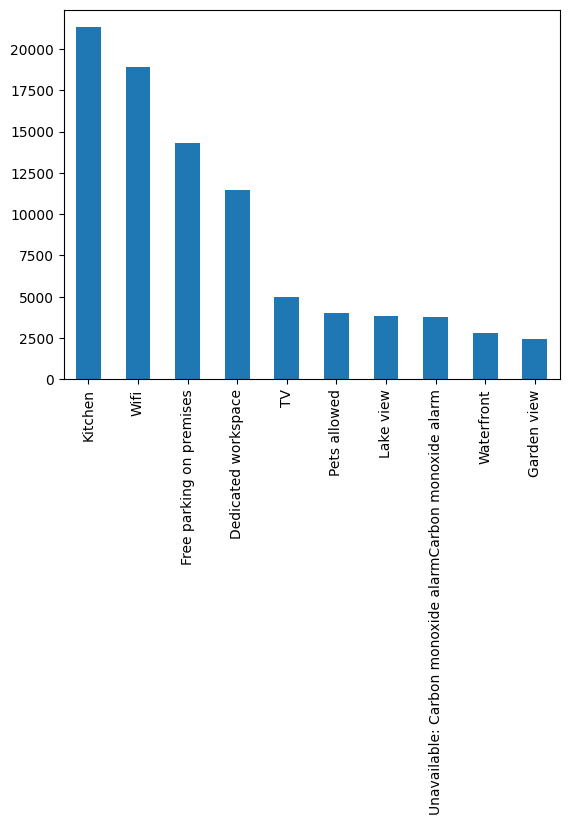

In [ ]:
pd.Series([sub_el for el in df['amenities'] for sub_el in el]).value_counts()[1:11].plot(kind='bar')

In [ ]:
print(pd.Series([sub_el for el in df['amenities'] for sub_el in el]).value_counts().to_string())

Unknown                                                                                                                  113791
Kitchen                                                                                                                   21315
Wifi                                                                                                                      18926
Free parking on premises                                                                                                  14290
Dedicated workspace                                                                                                       11445
TV                                                                                                                         4956
Pets allowed                                                                                                               4036
Lake view                                                                                               

In [ ]:
amenities_list = [
'Kitchen',
'Wifi',
'Free parking',
'Dedicated workspace',
'Lake view',
'TV',
'Waterfront'   ,
'Garden view'  ,
'Pets allowed'     ,
'Lock on bedroom door'       ,
'Beach access'  ,
'River view'  ,
'Lake access'  ,
'Washer'    ,
'Air conditioning'  ,
'Valley view'  ,
'Bay view'  ,
'Park view' ,
'Courtyard view'  ,
'Private patio or balcony'  ,
'Backyard'      ,
'Mountain view'    ,
'Indoor fireplace',
'Private sauna' ,
'Pool',
'Amazon' ,
'Netflix'    ,
'Apple TV'
'HBO Max',
'Disney+']

In [ ]:
df_amenities = pd.DataFrame(columns = amenities_list)
df_amenities

,Kitchen,Wifi,Free parking,Dedicated workspace,Lake view,TV,Waterfront,Garden view,Pets allowed,Lock on bedroom door,...,Private patio or balcony,Backyard,Mountain view,Indoor fireplace,Private sauna,Pool,Amazon,Netflix,Apple TVHBO Max,Disney+


In [ ]:
for amenity in amenities_list:
  bool_list = []
  for item in df['amenities']:
    if any(amenity in s for s in item):
      bool_list.append(1)
    else:
      bool_list.append(0)
  df_amenities[str(amenity)] = pd.Series(bool_list)


In [ ]:
  display(df_amenities)

,Kitchen,Wifi,Free parking,Dedicated workspace,Lake view,TV,Waterfront,Garden view,Pets allowed,Lock on bedroom door,...,Private patio or balcony,Backyard,Mountain view,Indoor fireplace,Private sauna,Pool,Amazon,Netflix,Apple TVHBO Max,Disney+
0,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23713,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23714,1,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
23715,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23716,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.join(df_amenities)

In [ ]:
df = df.drop(columns = 'amenities')
df = df.drop(columns = 'header')
df = df.drop(columns = 'description')
df = df.drop(columns = 'subtitle')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23718 entries, 0 to 23717
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   location                  23718 non-null  object
 1   title                     23718 non-null  object
 2   url                       23718 non-null  object
 3   subtitle                  23718 non-null  object
 4   price                     23631 non-null  object
 5   guests                    21106 non-null  object
 6   bedroom                   21363 non-null  object
 7   bath                      20899 non-null  object
 8   rating                    20457 non-null  object
 9   reviews                   21869 non-null  object
 10  property_type_Apartment   23718 non-null  bool  
 11  property_type_Barn        23718 non-null  bool  
 12  property_type_Bed         23718 non-null  bool  
 13  property_type_Bungalow    23718 non-null  bool  
 14  property_type_Cabin   

In [ ]:
df.columns

Index(['location', 'title', 'url', 'price', 'guests', 'bedroom', 'bath',
       'rating', 'reviews', 'Kitchen', 'Wifi', 'Free parking',
       'Dedicated workspace', 'Lake view', 'TV', 'Waterfront', 'Garden view',
       'Pets allowed', 'Lock on bedroom door', 'Beach access', 'River view',
       'Lake access', 'Washer', 'Air conditioning', 'Valley view', 'Bay view',
       'Park view', 'Courtyard view', 'Private patio or balcony', 'Backyard',
       'Mountain view', 'Indoor fireplace', 'Private sauna', 'Pool', 'Amazon',
       'Netflix', 'Apple TVHBO Max', 'Disney+', 'property_type_Apartment',
       'property_type_Barn', 'property_type_Bed', 'property_type_Bungalow',
       'property_type_Cabin', 'property_type_Camper/RV',
       'property_type_Campsite', 'property_type_Chalet', 'property_type_Condo',
       'property_type_Cottage', 'property_type_Dome', 'property_type_Farm',
       'property_type_Guesthouse', 'property_type_Home', 'property_type_Hotel',
       'property_type_Loft', 

In [ ]:
X = df[['location', 'price', 'guests', 'bedroom',
       'bath', 'rating', 'reviews', 'property_type_Apartment',
       'property_type_Barn', 'property_type_Bed', 'property_type_Bungalow',
       'property_type_Cabin', 'property_type_Camper/RV',
       'property_type_Campsite', 'property_type_Chalet', 'property_type_Condo',
       'property_type_Cottage', 'property_type_Dome', 'property_type_Farm',
       'property_type_Guesthouse', 'property_type_Home', 'property_type_Hotel',
       'property_type_Loft', 'property_type_Room', 'property_type_Tent',
       'property_type_Townhouse', 'property_type_Treehouse',
       'property_type_Villa', 'property_type_Yurt', 'Kitchen', 'Wifi',
       'Free parking', 'Dedicated workspace', 'Lake view', 'TV', 'Waterfront',
       'Garden view', 'Pets allowed', 'Lock on bedroom door', 'Beach access',
       'River view', 'Lake access', 'Washer', 'Air conditioning',
       'Valley view', 'Bay view', 'Park view', 'Courtyard view',
       'Private patio or balcony', 'Backyard', 'Mountain view',
       'Indoor fireplace', 'Private sauna', 'Pool', 'Amazon', 'Netflix',
       'Apple TVHBO Max', 'Disney+']]


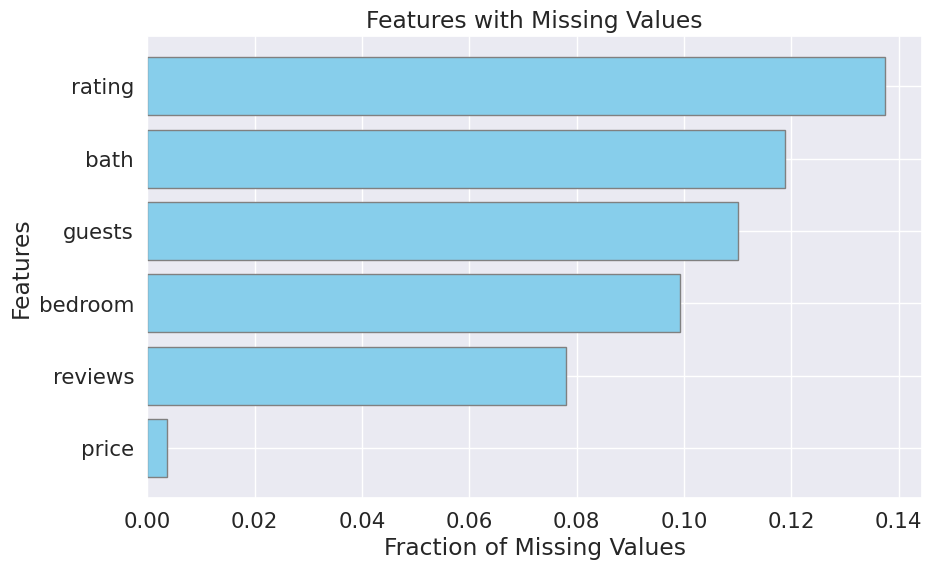

In [ ]:
feature_nan = X.isna().sum() / X.shape[0]
feature_nan = feature_nan[feature_nan > 0.0]
feature_nan = feature_nan.sort_values(ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.4)

# Create a horizontal bar plot
plt.barh(feature_nan.index, feature_nan.values, color='skyblue', edgecolor='gray')

# Add labels and a title
plt.xlabel("Fraction of Missing Values")
plt.ylabel("Features")
plt.title("Features with Missing Values")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
X = X.dropna()

In [ ]:
X['bedroom'] = X['bedroom'].replace('Studio', 0)

In [ ]:
X['reviews'] = X['reviews'].astype(int)
X['rating'] = X['rating'].astype(float)
X['guests'] = X['guests'].astype(float)
X['bedroom'] = X['bedroom'].astype(float)
X['bath'] = X['bath'].astype(float)

In [ ]:
Y = X['price']
X = X.drop('price', axis = 1)



In [ ]:
X = X[['guests', 'bedroom', 'bath',
       'property_type_Apartment', 'property_type_Bungalow',
       'property_type_Cabin', 'property_type_Camper/RV',
       'property_type_Campsite', 'property_type_Chalet', 'property_type_Condo',
       'property_type_Cottage', 'property_type_Dome', 'property_type_Farm',
       'property_type_Guesthouse', 'property_type_Home',
       'property_type_Houseboat', 'property_type_Loft', 'property_type_Room',
       'property_type_Tent', 'property_type_Townhouse',
       'property_type_Treehouse', 'property_type_Villa', 'property_type_Yurt',
       'Kitchen', 'Wifi', 'Free parking', 'Dedicated workspace', 'Lake view',
       'TV', 'Waterfront', 'Garden view', 'Pets allowed',
       'Lock on bedroom door', 'Beach access', 'River view', 'Lake access',
       'Washer', 'Air conditioning', 'Valley view', 'Bay view', 'Park view',
       'Courtyard view', 'Private patio or balcony', 'Backyard',
       'Mountain view', 'Indoor fireplace', 'Private sauna', 'rating',
       'reviews']]


In [ ]:
for i in Y.index:
  price = ""
  Y[i] = price.join(re.findall(r'\d', Y[i]))
Y = Y.astype(float)
Y

3        110.0
4        225.0
5        150.0
6        115.0
7        206.0
         ...  
23710    127.0
23712    172.0
23713    125.0
23715    354.0
23716    280.0
Name: price, Length: 17959, dtype: float64

Text(0.5, 1.0, 'Price distribution')

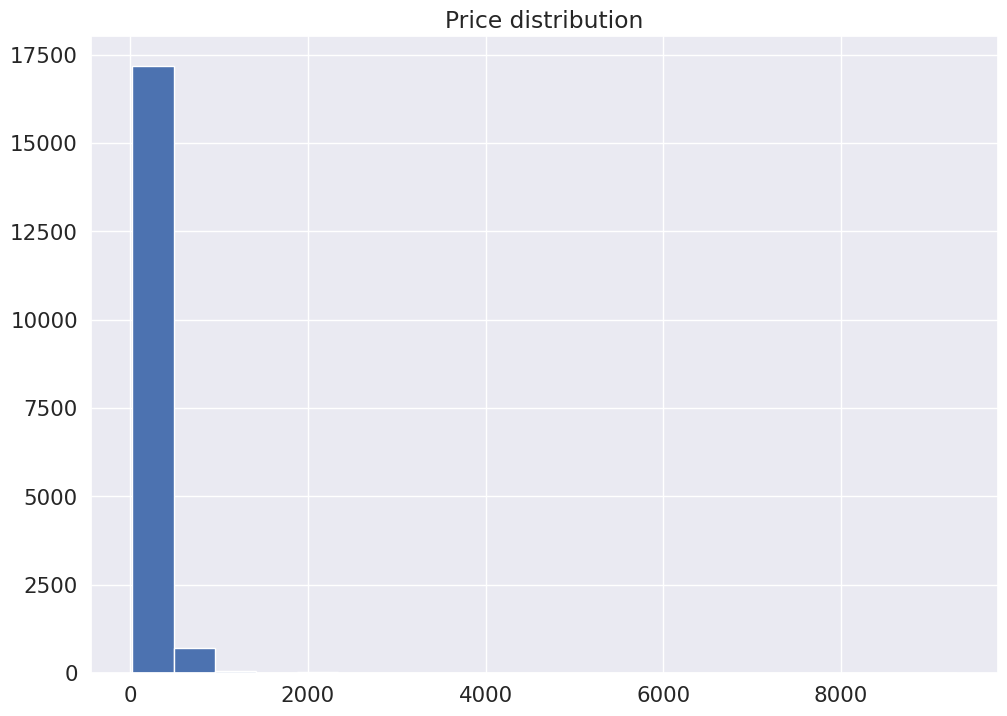

In [ ]:
plt.hist(Y, bins = 20)
plt.title('Price distribution')


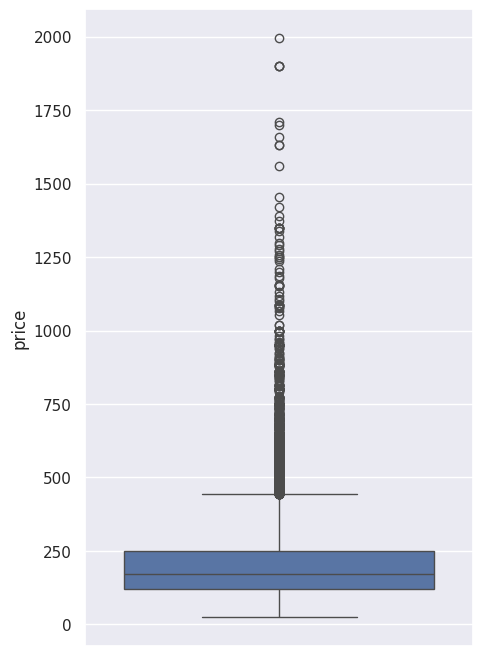

In [ ]:
sns.boxplot(data=Y)
sns.set_theme(rc={'figure.figsize':(5,8.27)})

In [ ]:
df = df.dropna()

In [ ]:
for i in df.index:
  price = ""
  df['price'][i] = price.join(re.findall(r'\d', df['price'][i]))
df['price'] = df['price'].astype(float)
df['price']

<ipython-input-31-d0290effa62b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][i] = price.join(re.findall(r'\d', df['price'][i]))
<ipython-input-31-d0290effa62b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][i] = price.join(re.findall(r'\d', df['price'][i]))
<ipython-input-31-d0290effa62b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][i] = price.join(re.findall(r'\d', df['price'][i]))
<ipytho

TypeError: expected string or bytes-like object

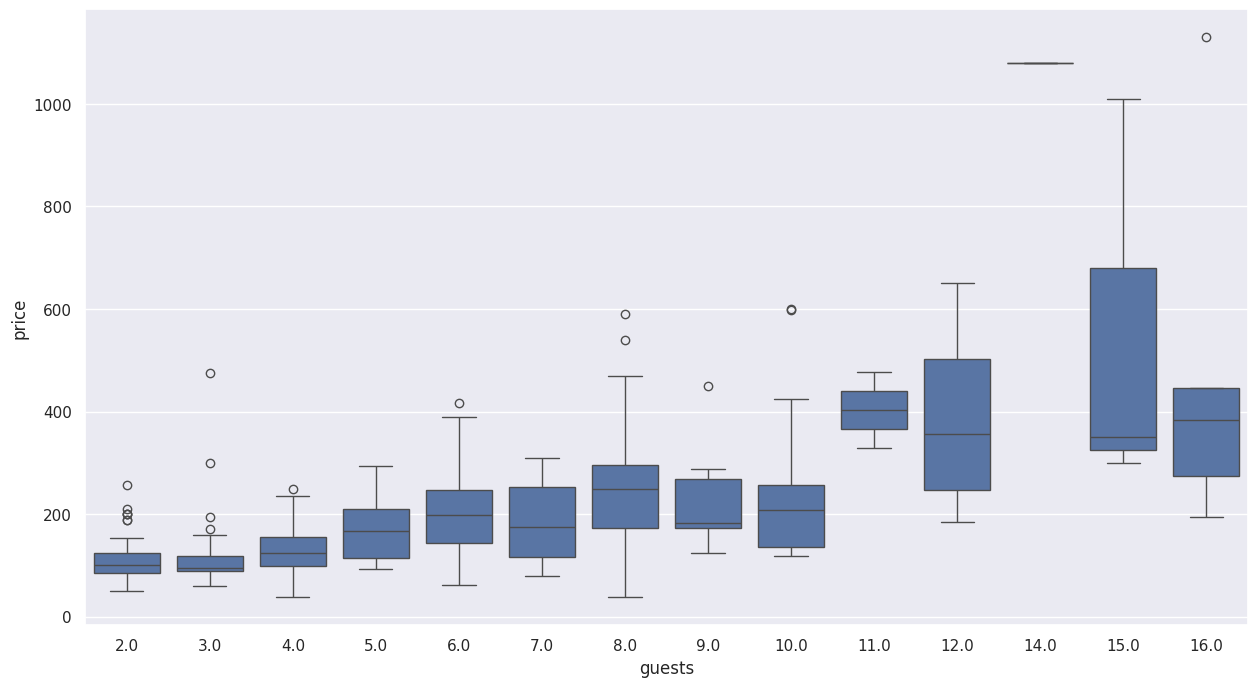

In [ ]:
df['guests'] = df['guests'].astype(float)
sns.boxplot(data=df, x='guests', y='price')
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

<ipython-input-197-642b46857d0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['guests'] = df['guests'].astype(float)


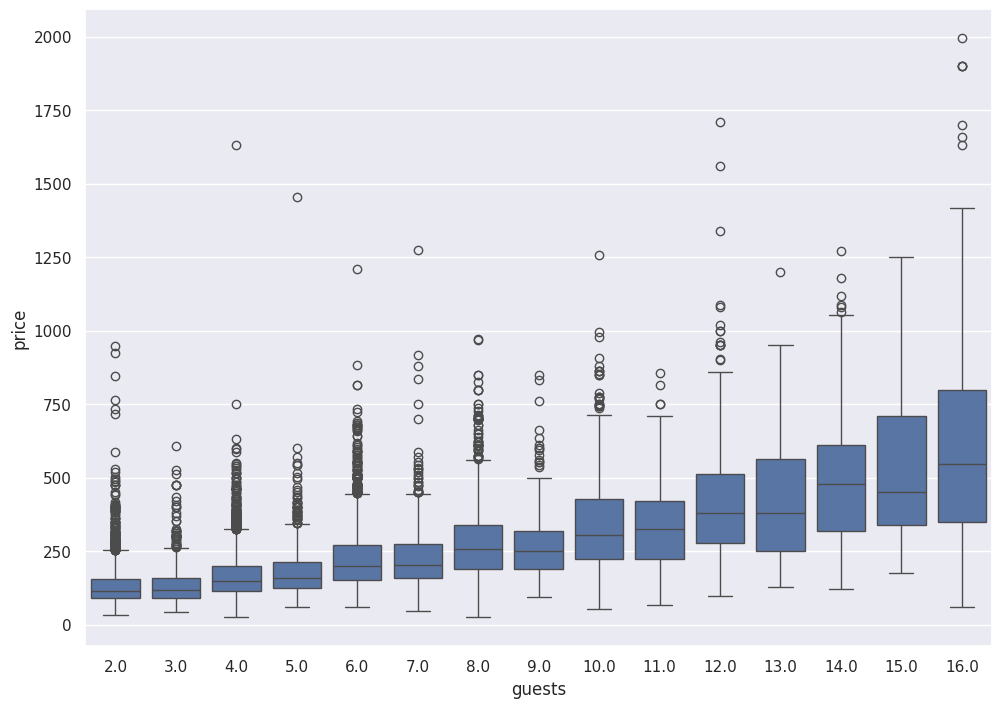

In [ ]:
df['guests'] = df['guests'].astype(float)
sns.boxplot(data=df, x='guests', y='price')
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

<ipython-input-199-5d394a76e616>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bedroom'] = df['bedroom'].replace('Studio', 0)
<ipython-input-199-5d394a76e616>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bedroom'] = df['bedroom'].astype(float)


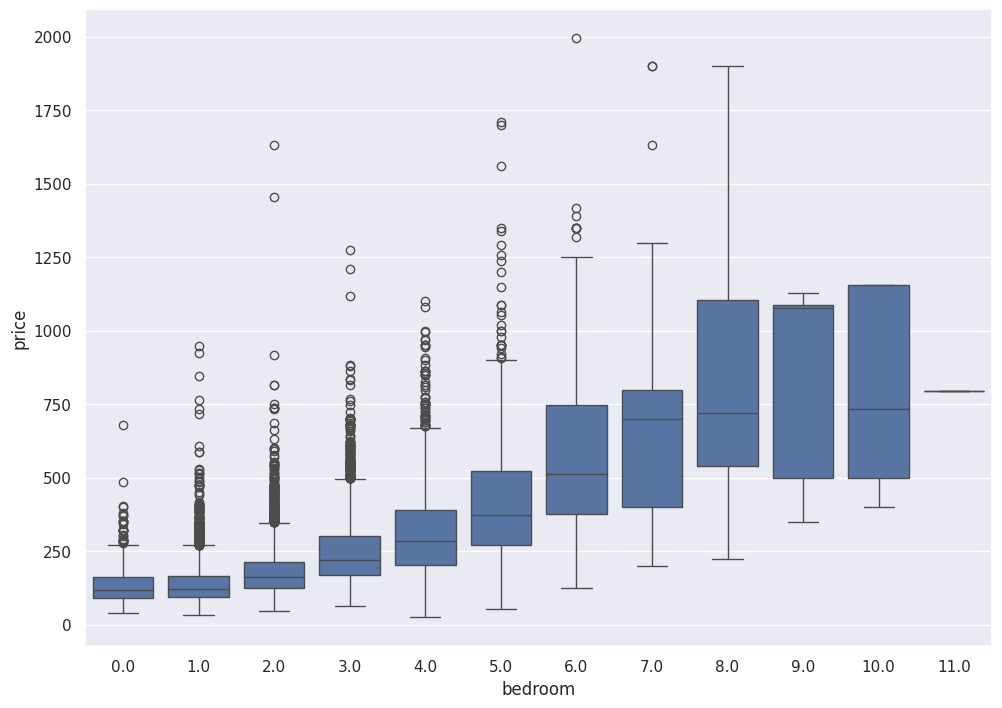

In [ ]:
df['bedroom'] = df['bedroom'].replace('Studio', 0)
df['bedroom'] = df['bedroom'].astype(float)
sns.boxplot(data=df, x='bedroom', y='price')
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

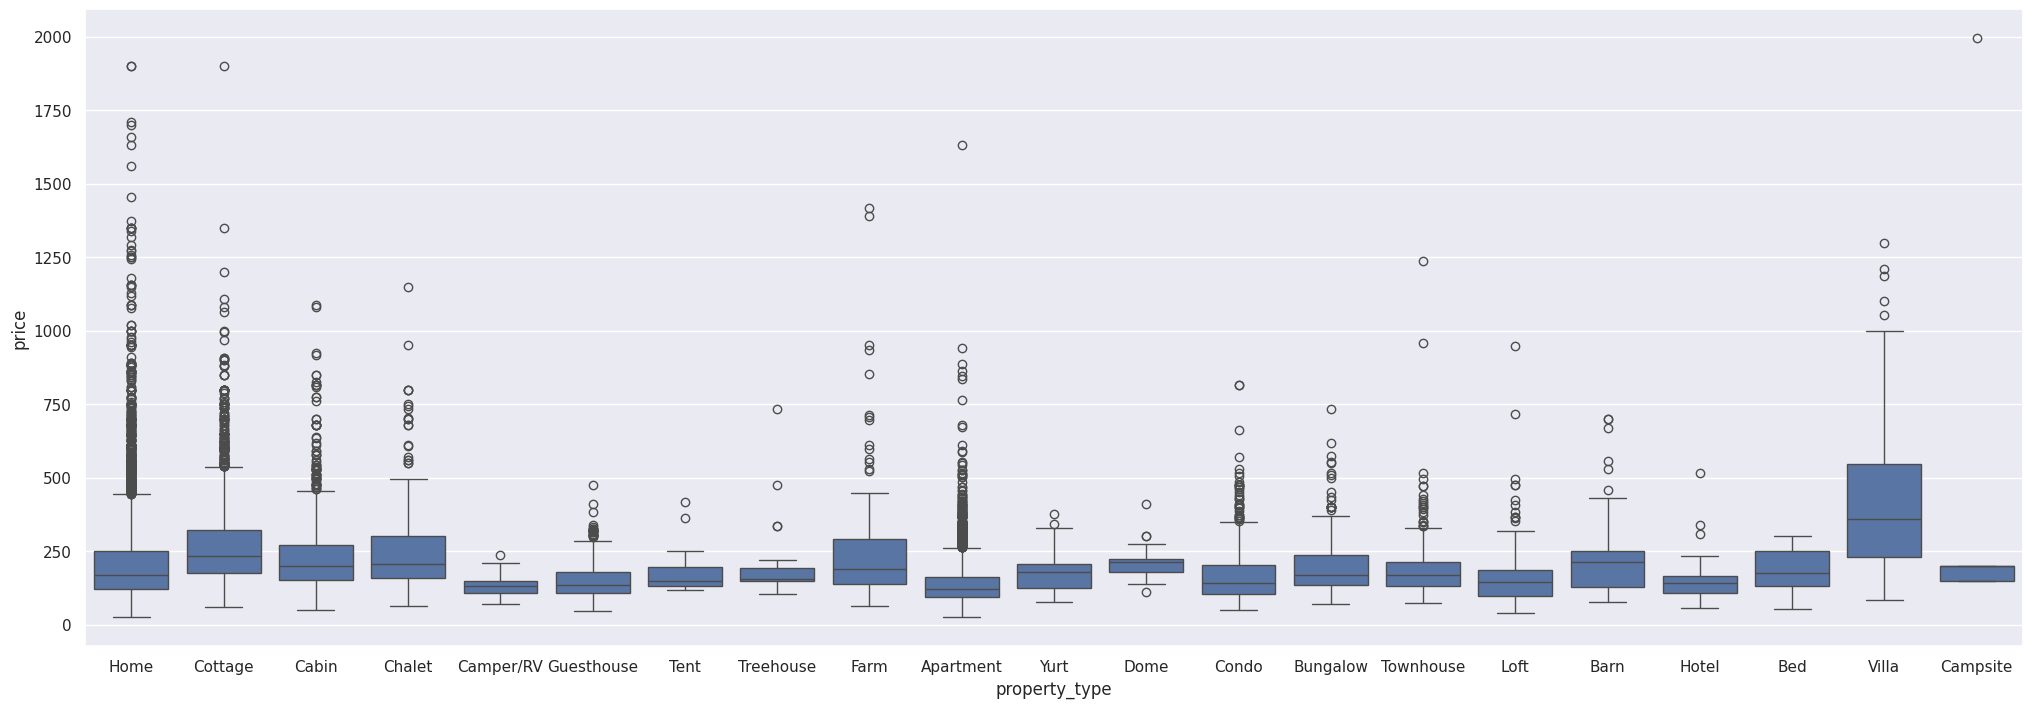

In [ ]:
sns.boxplot(data=df, x='property_type', y='price')
sns.set_theme(rc={'figure.figsize':(30,8.27)})

In [ ]:
X = X[Y<2000]
Y = Y[Y<2000]


In [ ]:
X.replace({False: 0, True: 1}, inplace=True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17949 entries, 3 to 23716
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   location                  17949 non-null  object 
 1   guests                    17949 non-null  float64
 2   bedroom                   17949 non-null  float64
 3   bath                      17949 non-null  float64
 4   rating                    17949 non-null  float64
 5   reviews                   17949 non-null  int64  
 6   property_type_Apartment   17949 non-null  int64  
 7   property_type_Barn        17949 non-null  int64  
 8   property_type_Bed         17949 non-null  int64  
 9   property_type_Bungalow    17949 non-null  int64  
 10  property_type_Cabin       17949 non-null  int64  
 11  property_type_Camper/RV   17949 non-null  int64  
 12  property_type_Campsite    17949 non-null  int64  
 13  property_type_Chalet      17949 non-null  int64  
 14  property_ty

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

In [ ]:
sum(Y.isna().to_numpy().flatten())

0

In [ ]:
Y_and_all_X_model = sm.OLS(np.asarray(y_train), np.asarray(X_train))

# fitted model and summary
Y_and_all_X_results = Y_and_all_X_model.fit()
print(Y_and_all_X_results.summary())

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(degree=2).fit_transform(X)

In [ ]:
Y_and_all_X_model = sm.OLS(np.asarray(y_train), np.asarray(X_train))

# fitted model and summary
Y_and_all_X_results = Y_and_all_X_model.fit()
print(Y_and_all_X_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     8.028
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           2.30e-21
Time:                        17:24:45   Log-Likelihood:                -1691.7
No. Observations:                 399   AIC:                             4021.
Df Residuals:                      80   BIC:                             5294.
Df Model:                         318                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2190.6315   3006.409     -0.729      0.4

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_test, y_test)

-9.752856866197007

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, reg.predict(X_test))

111656.04082244105

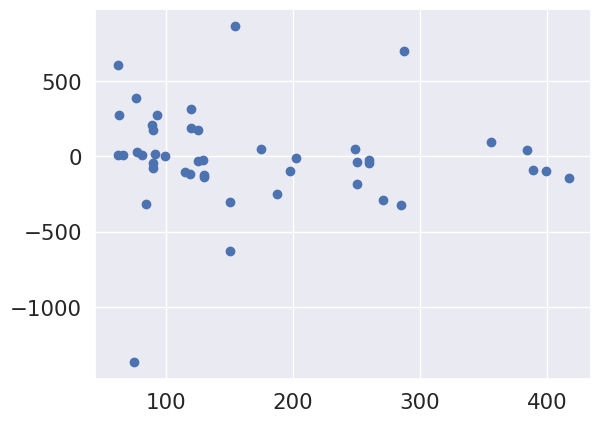

In [ ]:
plt.scatter(y_test, reg.predict(X_test)-y_test)




In [ ]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=1000, verbose = True).fit(X_train, y_train)

regr.score(X_test, y_test)

Iteration 1, loss = 2543775.96066049
Iteration 2, loss = 1218715.67071585
Iteration 3, loss = 442609.94558429
Iteration 4, loss = 96132.31946083
Iteration 5, loss = 16228.52935808
Iteration 6, loss = 73974.87660960
Iteration 7, loss = 194835.33968090
Iteration 8, loss = 272586.85210205
Iteration 9, loss = 264629.10704499
Iteration 10, loss = 199520.55042326
Iteration 11, loss = 103348.20765562
Iteration 12, loss = 36507.82241438
Iteration 13, loss = 8935.32039164
Iteration 14, loss = 11841.41687629
Iteration 15, loss = 25744.35320542
Iteration 16, loss = 36595.49093628
Iteration 17, loss = 26467.56249695
Iteration 18, loss = 14788.49134134
Iteration 19, loss = 10320.09650222
Iteration 20, loss = 16964.23249992
Iteration 21, loss = 13667.78005178
Iteration 22, loss = 7809.43887935
Iteration 23, loss = 5533.34546750
Iteration 24, loss = 6045.51332391
Iteration 25, loss = 6816.66889446
Iteration 26, loss = 6140.47887865
Iteration 27, loss = 4911.95709570
Iteration 28, loss = 4754.85802973

0.6458931851488323

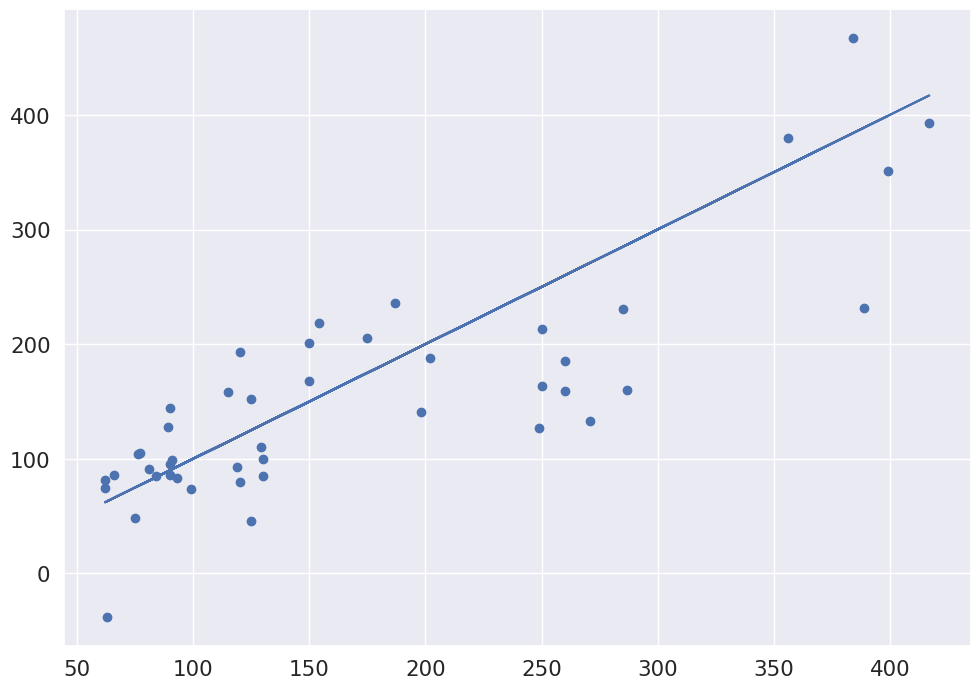

In [ ]:
plt.scatter(y_test, regr.predict(X_test))
plt.plot(y_test, y_test)

In [ ]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=0.1)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.2856822378062587

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, reg.predict(X_test))

7417.367701269079

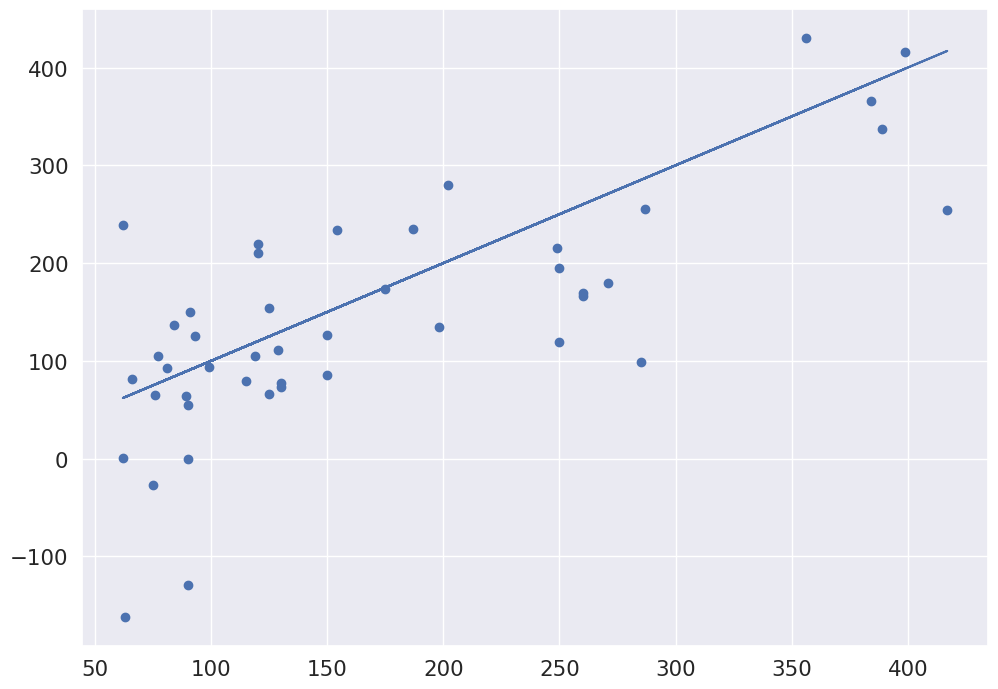

In [ ]:
plt.scatter(y_test, reg.predict(X_test))
plt.plot(y_test, y_test)

In [ ]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.2)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.605e+05, tolerance: 3.703e+02
  model = cd_fast.enet_coordinate_descent(


0.39822709390412414

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, reg.predict(X_test))

6248.718922327098

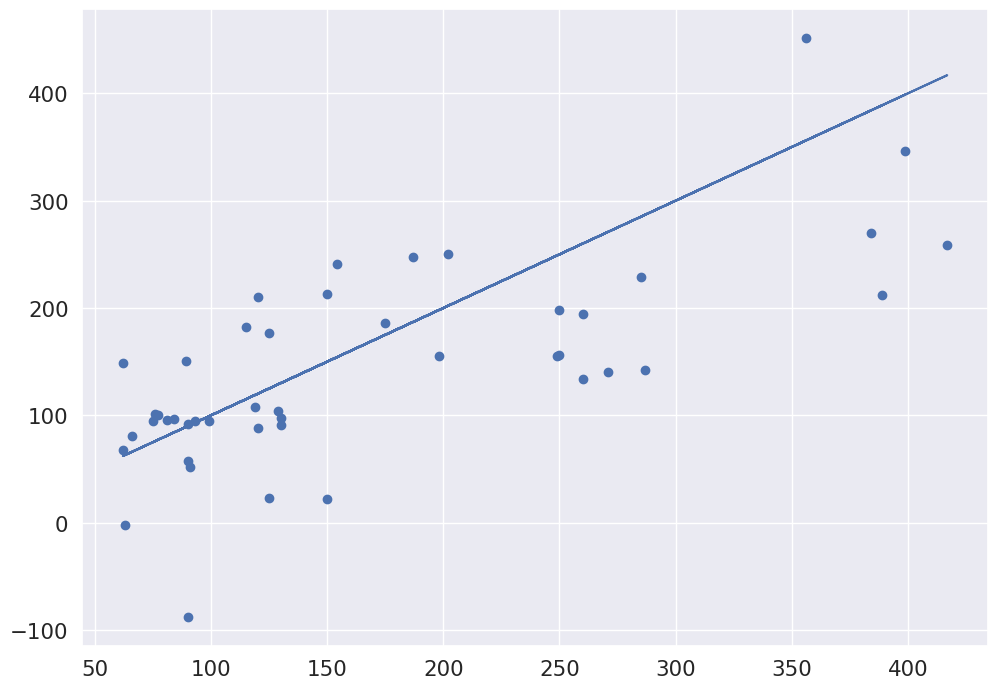

In [ ]:
plt.scatter(y_test, reg.predict(X_test))
plt.plot(y_test, y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(
n_estimators=500, learning_rate=0.1, max_depth=3, random_state=0,
loss='squared_error').fit(X_train, y_train)

In [ ]:
est.score(X_test, y_test)

0.6300673231938358

In [ ]:
mean_squared_error(y_test, est.predict(X_test))

3841.3250150173803

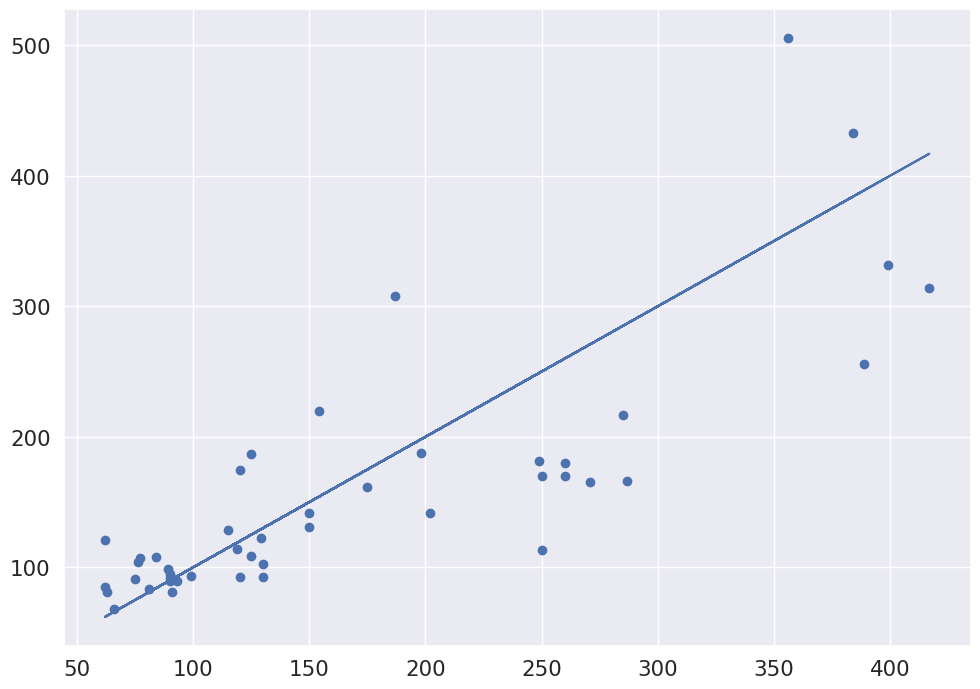

In [ ]:
plt.scatter(y_test, est.predict(X_test))
plt.plot(y_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators = 500, max_depth=5, random_state=0)
regr.fit(X_train, y_train)
regr.score(X_test, y_test
           )

0.7350739842244127

In [ ]:
mean_squared_error(y_test, regr.predict(X_test))

2750.951714549093

Text(0.5, 1.0, '')

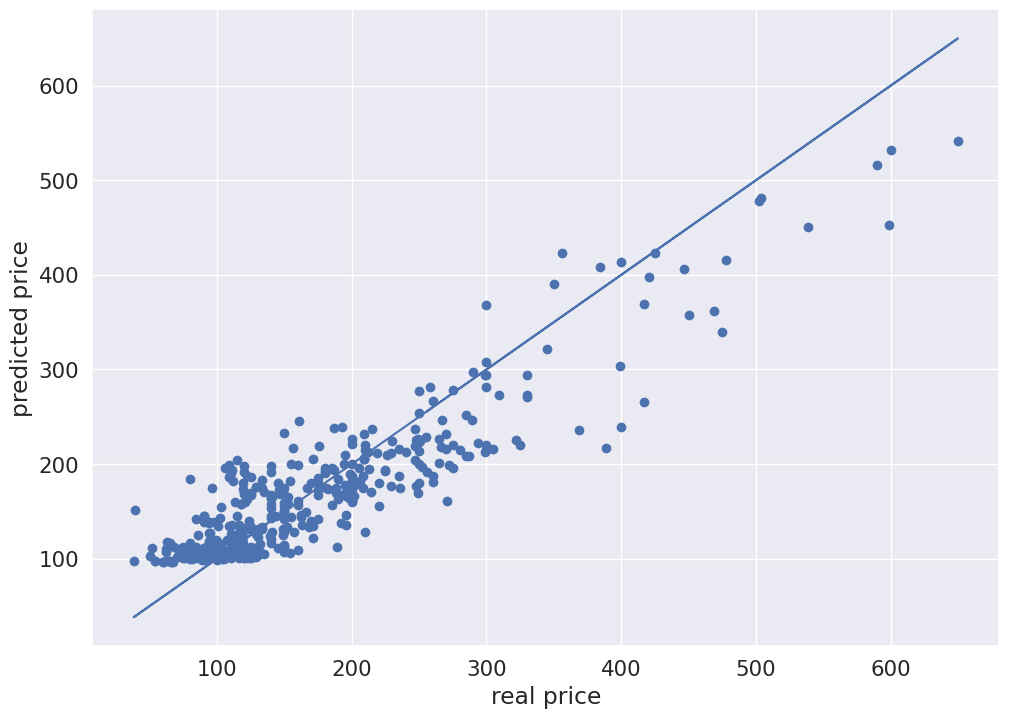

In [ ]:
plt.scatter(Y, regr.predict(X))
plt.plot(Y, Y)
plt.ylabel('predicted price')
plt.xlabel('real price')
plt.title('')

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


regr = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=6), n_estimators=500
)

regr.fit(X_train, y_train)

regr.score(X_test, y_test)

0.6536051239320773

In [ ]:
mean_squared_error(y_test, regr.predict(X_test))

3596.912048974704

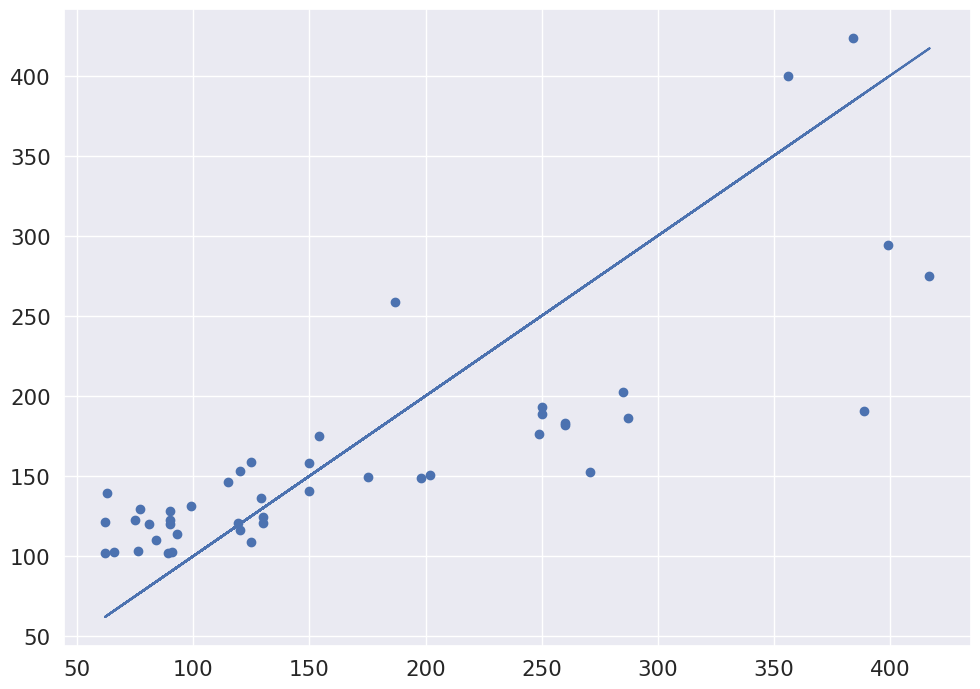

In [ ]:
plt.scatter(y_test, regr.predict(X_test))
plt.plot(y_test, y_test)